In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2021-12-15 00:53:39.021002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-15 00:53:39.021040: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-15 00:53:39.021093: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7a02c8cdf070): /proc/driver/nvidia/version does not exist
2021-12-15 00:53:39.021361: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Apply transform to images to extend our train and test samples

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [16]:
history = classifier.fit(training_set,
                                   steps_per_epoch = 50,
                                   epochs = 10,
                                   validation_data = test_set)

Epoch 1/10
50/50 [==============================] - 11s 224ms/step - loss: 0.4931 - accuracy: 0.7600 - val_loss: 0.5056 - val_accuracy: 0.7670
Epoch 2/10
50/50 [==============================] - 11s 229ms/step - loss: 0.4648 - accuracy: 0.7756 - val_loss: 0.5182 - val_accuracy: 0.7675
Epoch 3/10
50/50 [==============================] - 11s 227ms/step - loss: 0.4723 - accuracy: 0.7688 - val_loss: 0.5547 - val_accuracy: 0.7380
Epoch 4/10
50/50 [==============================] - 11s 221ms/step - loss: 0.4802 - accuracy: 0.7725 - val_loss: 0.5457 - val_accuracy: 0.7335
Epoch 5/10
50/50 [==============================] - 11s 221ms/step - loss: 0.4638 - accuracy: 0.7756 - val_loss: 0.5178 - val_accuracy: 0.7525
Epoch 6/10
50/50 [==============================] - 12s 238ms/step - loss: 0.4909 - accuracy: 0.7650 - val_loss: 0.5178 - val_accuracy: 0.7520
Epoch 7/10
50/50 [==============================] - 11s 219ms/step - loss: 0.4692 - accuracy: 0.7819 - val_loss: 0.5232 - val_accuracy: 0.7510

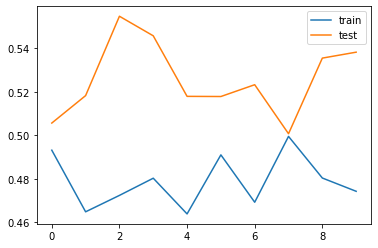

In [17]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Testing an image


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img("cat2.jpeg", target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(result[0][0])

1.0
